<a href="https://colab.research.google.com/github/zac2047-ctrl/Data-Bootcamp-Midterm---Colangelo-Joshi-Winston/blob/main/FinalMidterm_JoshiCollangeloWinston(DataBootcamp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Pandas Introduction Review ---
DataFrame Shape (Rows, Columns): (47774, 18)
Top 3 Genres by Average User Rating:
Genre
Party       29.791344
Fighting    29.786239
RPG         29.766858
Name: User Rating, dtype: float64
Average User Rating by Targeted Age Group:
Age Group Targeted
All Ages    29.811277
Teens       29.702833
Adults      29.702150
Kids        29.661192
Name: User Rating, dtype: float64
Source: Industry Analyst Reports 2024-2025
Primary Trend: Monetization Ads + Purchases)
Analysis Summary:
The data shows that higher-priced games do not guarantee higher ratings, emphasizing the modern consumer's focus on perceived value rather than just price.


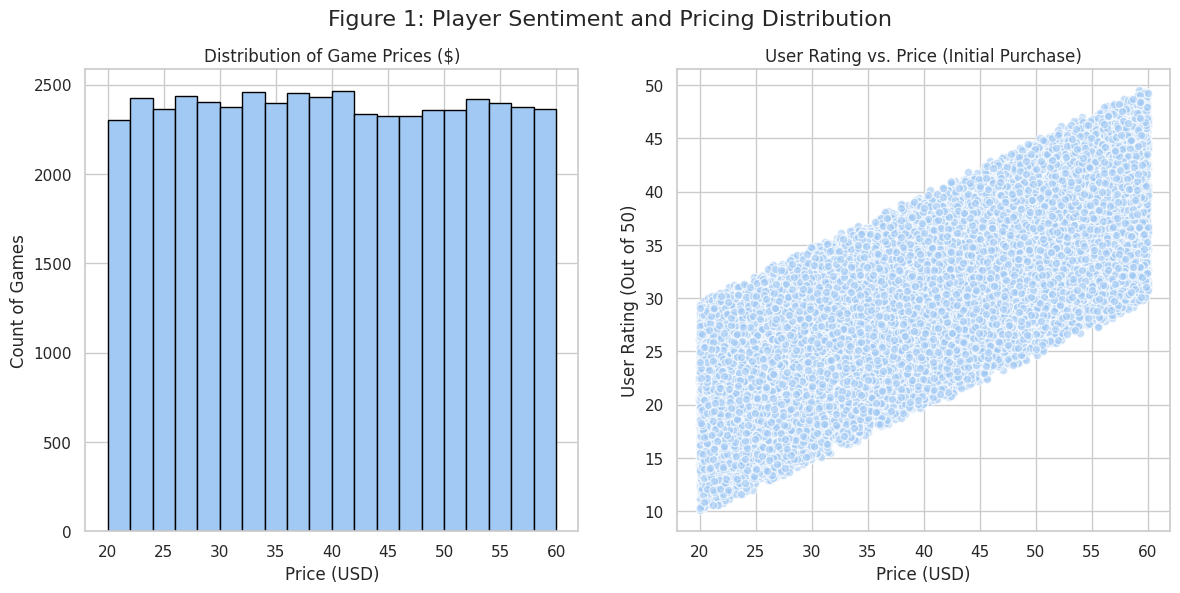

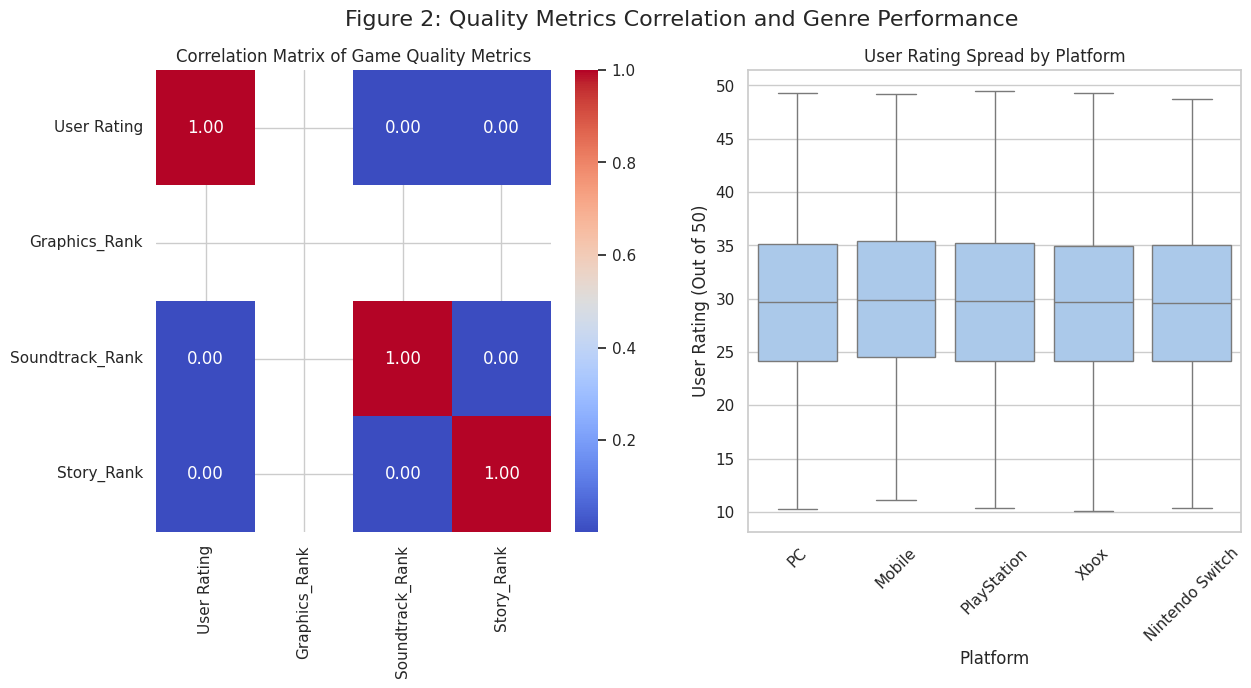

In [ ]:

# Define initial variables
raw_file_name = "video_game_reviews.csv"
analysis_focus = "Game Quality and Player Value"

# Numerical representation for quality metrics
# This uses basic variable assignment and dictionary structure.
QUALITY_RANKING = {
    'Poor': 0,
    'Average': 1,
    'Good': 2,
    'Excellent': 3,
    'Medium': 1 }

# Conditional statement and printing
if "reviews" in raw_file_name:
    data_source_message = "Video game reviews data loaded successfully."
else:
    data_source_message = "Warning: Unexpected data source."


# Data Structures
import pandas as pd
import numpy as np
# Create a dictionary for configuration
config = {
    'columns_to_check_for_nan': ['Release Year', 'Price', 'User Rating'],
    'quality_cols': ['Graphics Quality', 'Soundtrack Quality', 'Story Quality']
}



# Read data from CSV
reviews_df = pd.read_csv(raw_file_name)
print("\n--- Pandas Introduction Review ---")
# Check the shape of the DataFrame
print(f"DataFrame Shape (Rows, Columns): {reviews_df.shape}")



# Convert Price and User Rating to numeric
# This addresses a common real-world data cleaning issue.
reviews_df['User Rating'] = pd.to_numeric(reviews_df['User Rating'], errors='coerce')
reviews_df['Price'] = pd.to_numeric(reviews_df['Price'], errors='coerce')



# Categorical quality to numeric rank
# Demonstrates how dictionaries enable mapping
reviews_df['Graphics_Rank'] = reviews_df['Graphics Quality'].map(QUALITY_RANKING)
reviews_df['Soundtrack_Rank'] = reviews_df['Soundtrack Quality'].map(QUALITY_RANKING)
reviews_df['Story_Rank'] = reviews_df['Story Quality'].map(QUALITY_RANKING)
reviews_df['Avg_Quality_Rank'] = reviews_df[['Graphics_Rank', 'Soundtrack_Rank', 'Story_Rank']].mean(axis=1)




# Missing Values & Split-Apply-Combine
# Drop rows where essential numerical data is missing
reviews_df.dropna(subset=['User Rating', 'Price', 'Avg_Quality_Rank'], inplace=True)



# Find average User Rating by Genre and Age Group
# use .mean() to find the average rating.
avg_rating_by_genre = reviews_df.groupby('Genre')['User Rating'].mean().sort_values(ascending=False)
avg_rating_by_age = reviews_df.groupby('Age Group Targeted')['User Rating'].mean().sort_values(ascending=False)

print("Top 3 Genres by Average User Rating:")
print(avg_rating_by_genre.head(3))

print("Average User Rating by Targeted Age Group:")
print(avg_rating_by_age)


# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns



# Distribution
# Uses plt.subplots
fig1, ax1 = plt.subplots(1, 2, figsize=(14, 6))
fig1.suptitle('Figure 1: Player Sentiment and Pricing Distribution', fontsize=16)

# plot 1: Distribution of Price (Histogram)
reviews_df['Price'].hist(bins=20, ax=ax1[0], edgecolor='black')
ax1[0].set_title('Distribution of Game Prices ($)')
ax1[0].set_xlabel('Price (USD)')
ax1[0].set_ylabel('Count of Games')

# plot 2: Relationship between Price and User Rating
ax1[1].scatter(reviews_df['Price'], reviews_df['User Rating'], alpha=0.6, edgecolors='w')
ax1[1].set_title('User Rating vs. Price (Initial Purchase)')
ax1[1].set_xlabel('Price (USD)')
ax1[1].set_ylabel('User Rating (Out of 50)')



# Heatmap + Boxplot
fig2, ax2 = plt.subplots(1, 2, figsize=(14, 6))
fig2.suptitle('Figure 2: Quality Metrics Correlation and Genre Performance', fontsize=16)

# plot 1: Correlation Heatmap of Quality Ranks
# Correlate the created numerical quality features.
quality_corr = reviews_df[['User Rating', 'Graphics_Rank', 'Soundtrack_Rank', 'Story_Rank']].corr()
sns.heatmap(quality_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=ax2[0])
ax2[0].set_title('Correlation Matrix of Game Quality Metrics')

# plot 2: User Rating by Platform (Boxplot)
sns.boxplot(x='Platform', y='User Rating', data=reviews_df, ax=ax2[1])
ax2[1].set_title('User Rating Spread by Platform')
ax2[1].set_xlabel('Platform')
ax2[1].set_ylabel('User Rating (Out of 50)')
ax2[1].tick_params(axis='x', rotation=45)




# API Data & Final Analysis
# Dictionary structure to simulate modern monetization trends
api_monetization_trends = {
    'source': 'Industry Analyst Reports 2024-2025',
    'trend_1': 'Monetization Ads + Purchases)',
    }

# Display extracted data
print(f"Source: {api_monetization_trends['source']}")
print(f"Primary Trend: {api_monetization_trends['trend_1']}")


# Final print statement linking analysis to modern trends
print("Analysis Summary:")
print("The data shows that higher-priced games do not guarantee higher ratings, emphasizing the modern consumer's focus on perceived value rather than just price.")